## |MBGD

In [351]:
import pandas as pd

In [352]:
l1=[0.2,0.4,0.6,0.8]
l2=[3.4,3.8,4.2,4.8]
d={'x':l1,'y':l2}
data=pd.DataFrame(d)

In [353]:
data

,x,y
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.8


In [354]:
m=1
c=-1
l=0.1
e_list=[]
batch_size=2
batches=len(data)/batch_size

In [355]:
def y_value(m,c,x):
    y=[]
    for i in x:
        y_v=m*i+c
        y.append(y_v)
    return y

In [1]:
def error(y_actual,y_predicted):
    e=[]
    e=(y_actual-y_predicted)
    e=e**2
    e=sum(e)/(2*batch_size)
    return e

In [357]:
def gradient(m,c,y_actual,y_predicted,x):
    g_m=(y_actual-y_predicted)*(-1)*x
    g_c=(y_actual-y_predicted)*(-1)
    m=m-l*(g_m.sum()/batch_size)
    c=c-l*(g_c.sum()/batch_size)
    return m,c

In [358]:
for i in range(20):
    for sample in range(0,len(data),batch_size):
        y_predicted=y_value(m,c,data['x'][sample:(sample+batch_size)])
        y_actual=data['y'][sample:(sample+batch_size)]
        e=error(y_actual,y_predicted)
        m,c=gradient(m,c,y_actual,y_predicted,data['x'][sample:(sample+batch_size)])
        e_list.append(e)

In [359]:
e_list

[9.25,
 9.172405000000001,
 5.488540920999999,
 5.255981445404649,
 3.2747376376542423,
 2.9968765426652326,
 1.967773326199035,
 1.6975550531547166,
 1.1931532846074742,
 0.9531483680027348,
 0.7317800241241355,
 0.5288798903319901,
 0.45528840356211575,
 0.2887738321052355,
 0.2883341531492143,
 0.15420411101381165,
 0.18659028079687978,
 0.07980306942401105,
 0.12390036086505972,
 0.03946709735250226,
 0.08477181645810919,
 0.0182330682903178,
 0.05998482676219146,
 0.007566978340653228,
 0.0440201950169256,
 0.0026347757786962015,
 0.03355002561635418,
 0.0007238860196430878,
 0.026550048530082377,
 0.0003321407214792362,
 0.021776044259503163,
 0.0006433505719713225,
 0.01845389500550188,
 0.0012265274234845604,
 0.01609525488484849,
 0.0018642127974576425,
 0.014387298226210512,
 0.002455137003342898,
 0.013126309480414305,
 0.002959520943146439]

In [360]:
0.9*m+c

5.111742991902384

Text(0.5, 0, 'iterations')

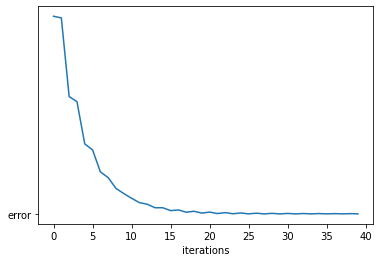

In [361]:
import matplotlib.pyplot as plt
plt.plot(e_list)
plt.plot("error")
plt.xlabel("iterations")

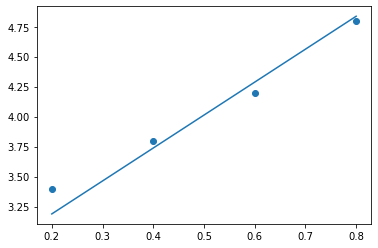

In [362]:
plt.scatter(data['x'],data['y'])
plt.plot(data['x'],m*data['x']+c)